In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('/Users/lenovo1/Downloads/Ironhack/final_project/Data_Raw/mcp_preprocessed.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# Train Test Split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=0)

# Correlation Matrix

In [4]:
correlation_matrix = df.corr()

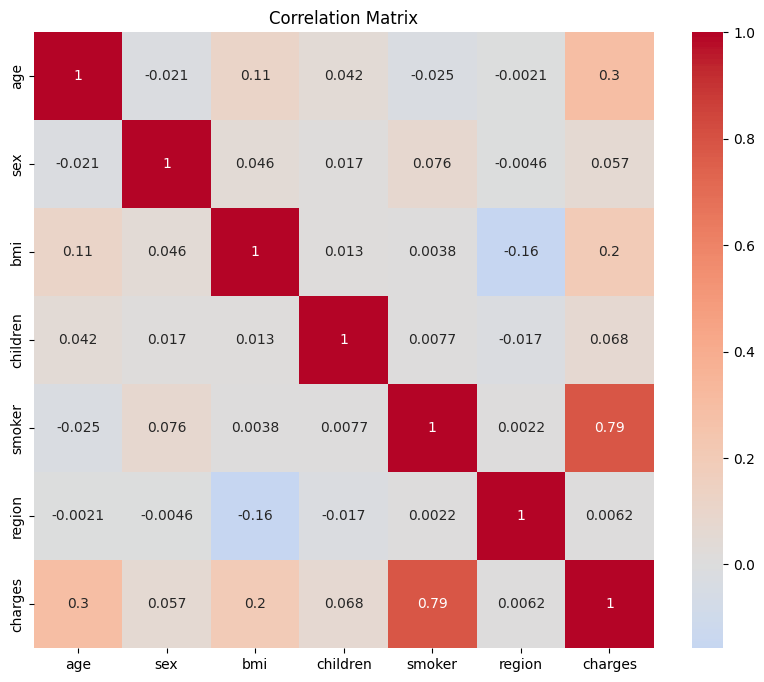

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Model Building

In [6]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [7]:
#model training
lr.fit(x_train,y_train)
#model accuracy
lr.score(x_train,y_train)

0.7368306228430944

In [8]:
#model prediction
y_pred = lr.predict(x_test)

In [9]:
#Linear regression
results = pd.DataFrame({"Set": ["Train"]*x_train.shape[0] + ["Test"]*x_test.shape[0],
             "y_real": y_train.values.tolist() + y_test.values.tolist(),
             "y_pred_lm": lr.predict(x_train).tolist() + lr.predict(x_test).tolist() })
results

,Set,y_real,y_pred_lm
0,Train,40182.24600,33388.190268
1,Train,1137.46970,3615.429843
2,Train,38511.62830,30678.690738
3,Train,4670.64000,8023.135810
4,Train,13019.16105,14151.875606
...,...,...,...
1333,Test,15019.76005,14699.098767
1334,Test,6664.68595,8210.854549
1335,Test,20709.02034,16019.284542
1336,Test,40932.42950,33104.944084


In [10]:
#  K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [11]:
# Model training
knn.fit(x_train, y_train)
#model accuracy
knn.score(x_train, y_train)

0.392282505312589

In [12]:
# Model prediction
knn_pred = knn.predict(x_test)

In [13]:
#  K-Nearest Neighbors (KNN)
results = pd.DataFrame({"Set": ["Train"]*x_train.shape[0] + ["Test"]*x_test.shape[0],
             "y_real": y_train.values.tolist() + y_test.values.tolist(),
             "y_pred_knn": knn.predict(x_train).tolist() + knn.predict(x_test).tolist() })
results

,Set,y_real,y_pred_knn
0,Train,40182.24600,26387.033200
1,Train,1137.46970,3205.891130
2,Train,38511.62830,24310.724200
3,Train,4670.64000,18245.556240
4,Train,13019.16105,12626.344100
...,...,...,...
1333,Test,15019.76005,20374.120836
1334,Test,6664.68595,10057.845170
1335,Test,20709.02034,11317.910810
1336,Test,40932.42950,14255.497064


In [14]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [15]:
#model training
rf.fit(x_train,y_train)
#model accuracy
rf.score(x_train,y_train)

0.9734546934614319

In [16]:
#model prediction
rf_pred = rf.predict(x_test)

In [17]:
#random forest regressor
results = pd.DataFrame({"Set": ["Train"]*x_train.shape[0] + ["Test"]*x_test.shape[0],
             "y_real": y_train.values.tolist() + y_test.values.tolist(),
             "y_pred_rf": rf.predict(x_train).tolist() + rf.predict(x_test).tolist() })
results

,Set,y_real,y_pred_rf
0,Train,40182.24600,39982.891001
1,Train,1137.46970,1452.654276
2,Train,38511.62830,38079.207059
3,Train,4670.64000,4760.930016
4,Train,13019.16105,12718.731181
...,...,...,...
1333,Test,15019.76005,16350.769206
1334,Test,6664.68595,6630.066135
1335,Test,20709.02034,11350.987246
1336,Test,40932.42950,42550.187999


# Model Evaluation

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Linear Regression

fig, ax = plt.figure(2,2,figsize=(7,5))
sns.scatterplot(#x=real_value, y=predicted_value ) # first row, first column, train
sns.distplot(#errors=real-predicted,hist=False,color='b',,ax=ax1), train
sns.scatterplot(#x=real_value, y=predicted_value ) # first row, first column, test
sns.distplot(#errors=real-predicted,hist=False,color='b',,ax=ax1), test

plt.show()


/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62486/3899792752.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_errors, hist=False, color='b', ax=ax2)
/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62486/3899792752.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

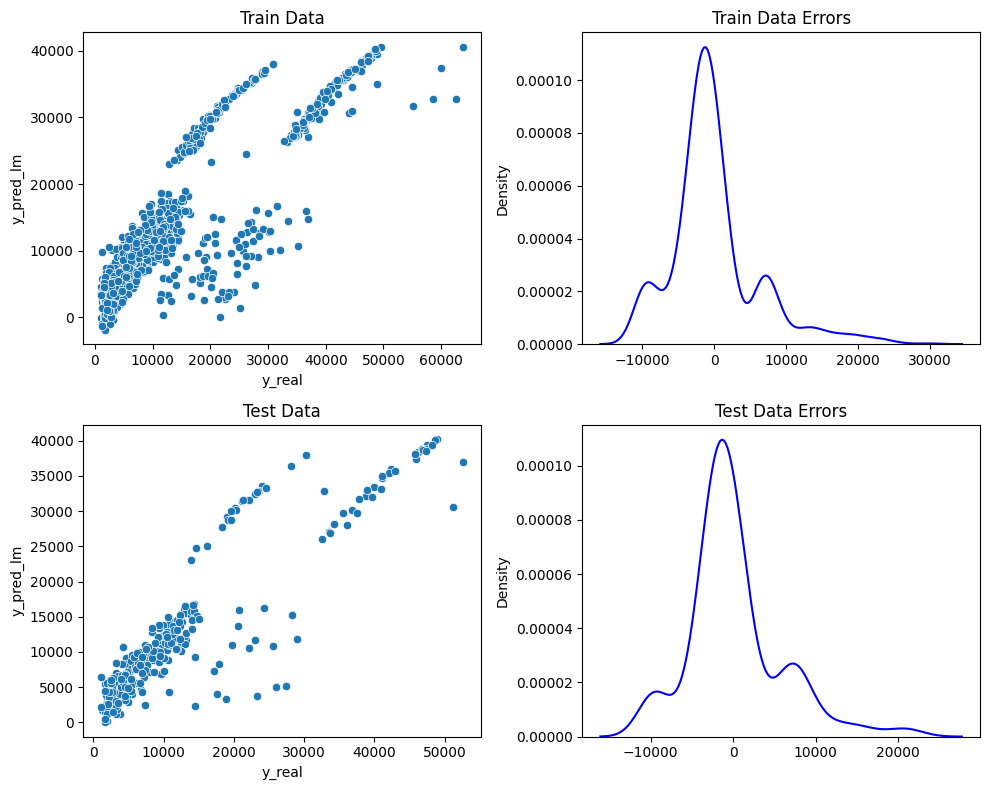

In [19]:
# Assuming you have x_train, y_train, x_test, y_test, lr defined somewhere

# Create results DataFrame
results = pd.DataFrame({
    "Set": ["Train"] * x_train.shape[0] + ["Test"] * x_test.shape[0],
    "y_real": y_train.values.tolist() + y_test.values.tolist(),
    "y_pred_lm": lr.predict(x_train).tolist() + lr.predict(x_test).tolist()
})

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot for training data
sns.scatterplot(data=results[results["Set"] == "Train"], x="y_real", y="y_pred_lm", ax=ax1)
ax1.set_title('Train Data')

# Distribution plot for training data errors
train_errors = results[results["Set"] == "Train"]["y_real"] - results[results["Set"] == "Train"]["y_pred_lm"]
sns.distplot(train_errors, hist=False, color='b', ax=ax2)
ax2.set_title('Train Data Errors')

# Scatter plot for test data
sns.scatterplot(data=results[results["Set"] == "Test"], x="y_real", y="y_pred_lm", ax=ax3)
ax3.set_title('Test Data')

# Distribution plot for test data errors
test_errors = results[results["Set"] == "Test"]["y_real"] - results[results["Set"] == "Test"]["y_pred_lm"]
sns.distplot(test_errors, hist=False, color='b', ax=ax4)
ax4.set_title('Test Data Errors')

plt.tight_layout()
plt.show()


In [20]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 3930.333273901141
MSE: 31845929.13415943
RMSE: 5643.219748880902
R2 Score: 0.7998747145449959


In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))
print('R2 Score:', round(r2, 3))

MAE: 3930.33
MSE: 31845929.13
RMSE: 5643.22
R2 Score: 0.8


K-Nearest Neighbors(KNN)

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62486/295928618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62486/295928618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

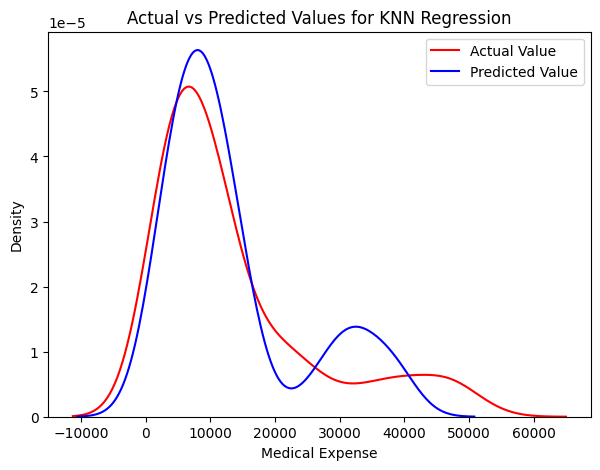

In [22]:
plt.figure(figsize=(7, 5))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Value', ax=ax1)
plt.title('Actual vs Predicted Values for KNN Regression')
plt.xlabel('Medical Expense')
plt.legend()
plt.show()

In [23]:
print('MAE:', mean_absolute_error(y_test, knn_pred))
print('MSE:', mean_squared_error(y_test, knn_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, knn_pred)))
print('R2 Score:', knn.score(x_test,y_test))

MAE: 7606.675231593283
MSE: 123331807.05768009
RMSE: 11105.485448987814
R2 Score: 0.2249617529097354


In [24]:
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
r2_score_knn = knn.score(x_test, y_test)

print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))
print('R2 Score:', round(r2_score_knn, 2))

MAE: 7606.68
MSE: 123331807.06
RMSE: 11105.49
R2 Score: 0.22


RandomForestRegressor

/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62486/4145278179.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/mm/cjv4cnl90rz3rsp85pkv7wk80000gp/T/ipykernel_62486/4145278179.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

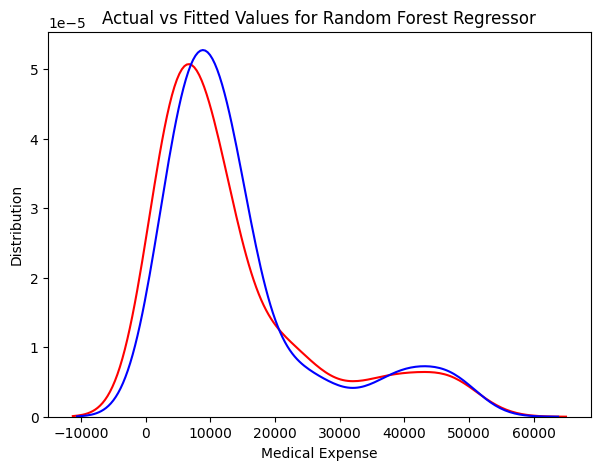

In [25]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [26]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2 Score:', rf.score(x_test,y_test))

MAE: 2727.942898300963
MSE: 20442852.590399742
RMSE: 4521.377289101159
R2 Score: 0.8715336050352515


In [27]:
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)
r2_score_rf = rf.score(x_test, y_test)

print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))
print('R2 Score:', round(r2_score_rf, 2))

MAE: 2727.94
MSE: 20442852.59
RMSE: 4521.38
R2 Score: 0.87


In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for KNN using GridSearchCV
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_classifier = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_classifier, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Hyperparameter tuning for Random Forest using GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
rf_classifier = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Evaluate the best models on the validation set
knn_pred = best_knn.predict(X_val)
rf_pred = best_rf.predict(X_val)

knn_accuracy = accuracy_score(y_val, knn_pred)
rf_accuracy = accuracy_score(y_val, rf_pred)

print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


KNN Accuracy: 1.0
Random Forest Accuracy: 1.0


/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/lenovo1/final_project/final_project_env/lib/python3.10/site-packages/

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

## Conclusion
From the above models, we can see that Decision Tree Regressor and Random Forest Regressor are giving the best results. But, Random Forest Regressor is giving the best results with the least RMSE value. Therefore, I will use Random Forest Regressor to predict the medical expense of patients.


Moreover, the medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.

Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.